In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv


<img src="https://tse4.mm.bing.net/th?id=OIP.ApU6QocPrbJFqpSxAvneowAAAA&pid=Api&P=0&w=340&h=160" width=900px>

In [14]:
df=pd.read_csv(r'/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv')

In [15]:
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [16]:
df.shape

(44, 20)

In [17]:
df.isnull().any()

Weapon Name              False
Weapon Type              False
Bullet Type               True
Damage                   False
Magazine Capacity        False
Range                     True
Bullet Speed              True
Rate of Fire             False
Shots to Kill (Chest)    False
Shots to Kill (Head)     False
Damage Per Second        False
Fire Mode                False
BDMG_0                    True
BDMG_1                    True
BDMG_2                    True
BDMG_3                    True
HDMG_0                    True
HDMG_1                    True
HDMG_2                    True
HDMG_3                    True
dtype: bool

In [18]:
## null values are related to other melee weapons like crossbow,pan,sickle..etc. so we will drop it
df.dropna(axis=0,inplace=True)

In [19]:
df.shape

(35, 20)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

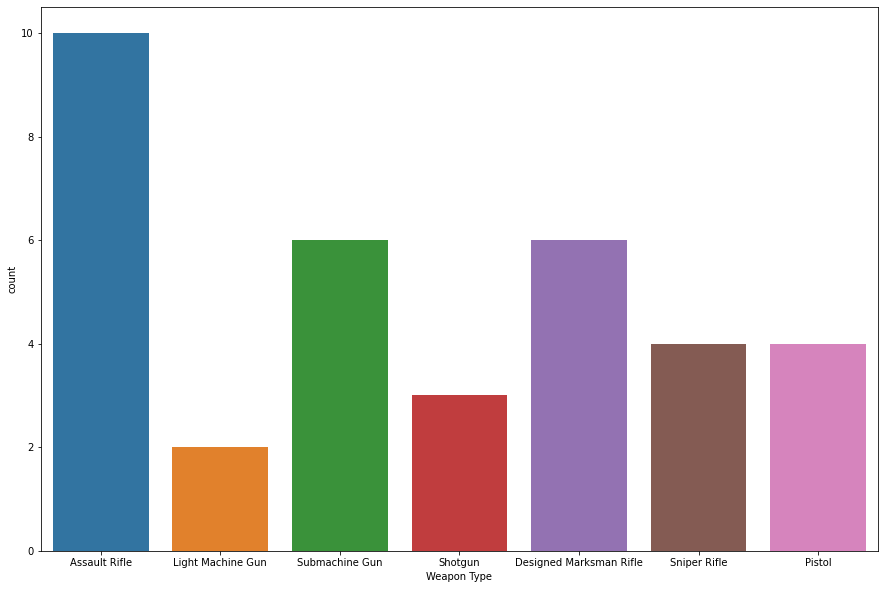

In [53]:
## weapon type
plt.figure(figsize=(15,10))
sns.countplot(df['Weapon Type'])
plt.show()

### as usual Assault rifles are more productive guns in PUBG game

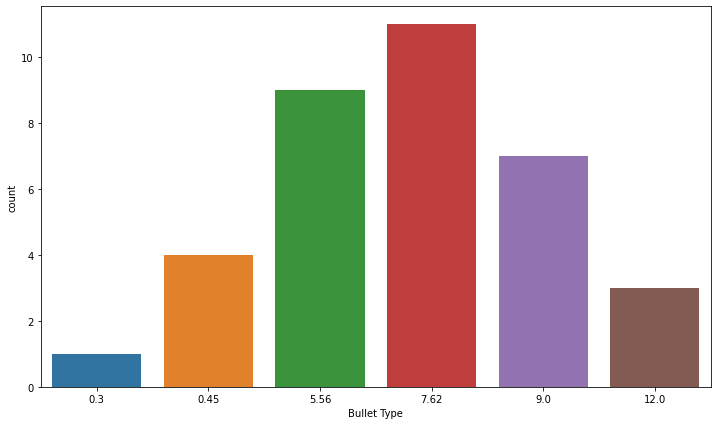

In [52]:
## bullet type
plt.figure(figsize=(12,7))
sns.countplot(df['Bullet Type'])
plt.show()

As very good guns like groza akm and etc.. holds 7.62 ammo type they are productive

<img src="https://cdn.statically.io/img/kavogaming.com/wp-content/uploads/2019/10/PUBG-Ammo-types-new-1024x128.jpg?quality=100" width=900>

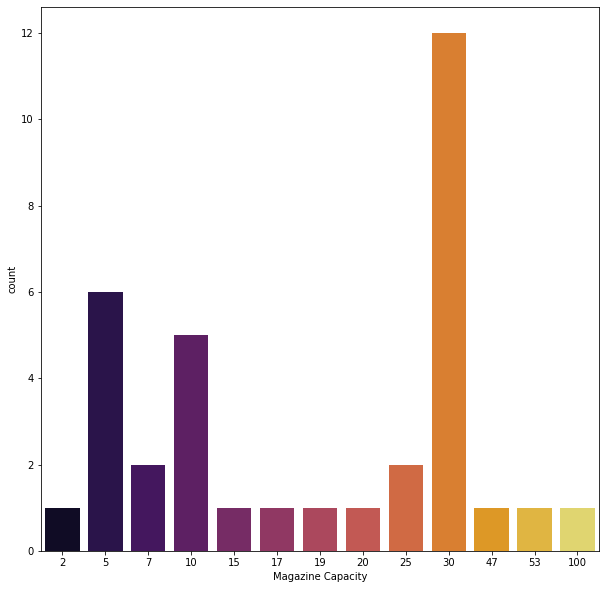

In [51]:
## magaizne capacity
plt.figure(figsize = (10,10))
sns.countplot (df['Magazine Capacity'], palette="inferno")
plt.show()

## Magazine capacity plays an important role in close range fight encounters.weapon having max magazine capacity can knock down multiple enemies in a spray of bullets

In [68]:
dum=df.groupby('Weapon Type')['Damage'].mean().reset_index()
dum.head()

,Weapon Type,Damage
0,Assault Rifle,45.200000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
3,Pistol,38.500000
4,Shotgun,210.000000


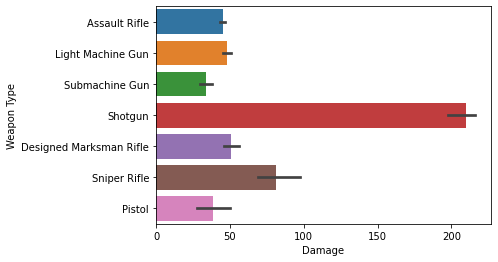

In [69]:
sns.barplot(y=df['Weapon Type'],x=df['Damage'],data=dum)

## we can clearly observe the weapon type and its damage

In [47]:
most_damaging_weapon = df[df["Weapon Type"] == "Assault Rifle"][["Damage", "Weapon Name"]].sort_values("Damage", ascending  = False)
most_damaging_weapon

,Damage,Weapon Name
0,49,Groza
1,49,AKM
3,49,MK47 Mutant
2,47,M762
4,43,AUG A3
5,43,SCAR-L
6,43,M416
7,43,M16A4
8,43,G36C
9,43,OBZ


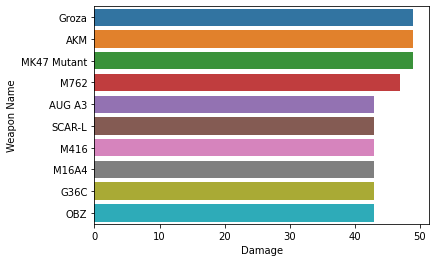

In [48]:
sns.barplot(x=most_damaging_weapon['Damage'],y=most_damaging_weapon['Weapon Name'])

## here, we observe that weapons of ammo type 5.56 are having almost same damage(like scar-L,m416,qbz....etc)

## but compared to the weapons of ammo type 7.76 they are low

## here we can conclude that groza and akm are king of pubg in the case of damage!!!!

<img src="https://tse1.mm.bing.net/th?id=OIP.cayZZ95XKxd5RGIC6wPmgAHaEF&pid=Api&P=0&w=280&h=155" width=500px>

<img src="https://tse4.mm.bing.net/th?id=OIP.-ACPII08MW3hrbVV6ss5GQHaHa&pid=Api&P=0&w=300&h=300 width=450px">

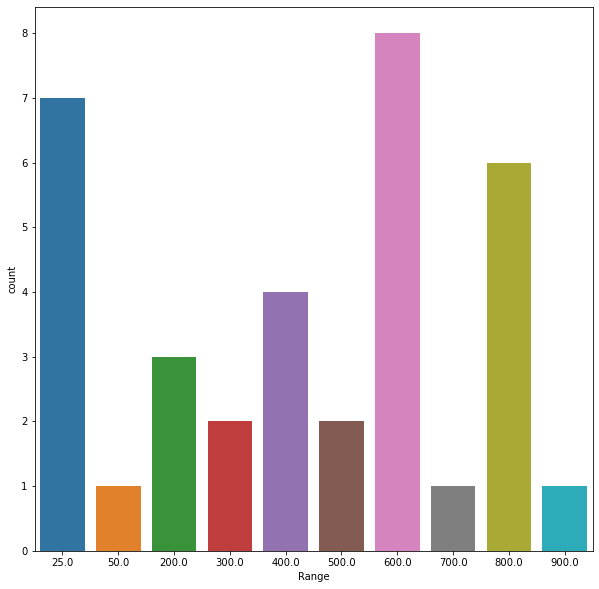

In [50]:
## range of the weapon
plt.figure(figsize=(10,10))
sns.countplot(df['Range'])
plt.show()

## range of the weapon is also very important ,a player must know the range of the weapon in order to know which guns to use for long range and short range

In [66]:
bs=df.groupby('Weapon Type')['Bullet Speed'].mean().reset_index()
bs.head()

,Weapon Type,Bullet Speed
0,Assault Rifle,816.50
1,Designed Marksman Rifle,763.00
2,Light Machine Gun,815.00
3,Pistol,333.75
4,Shotgun,360.00


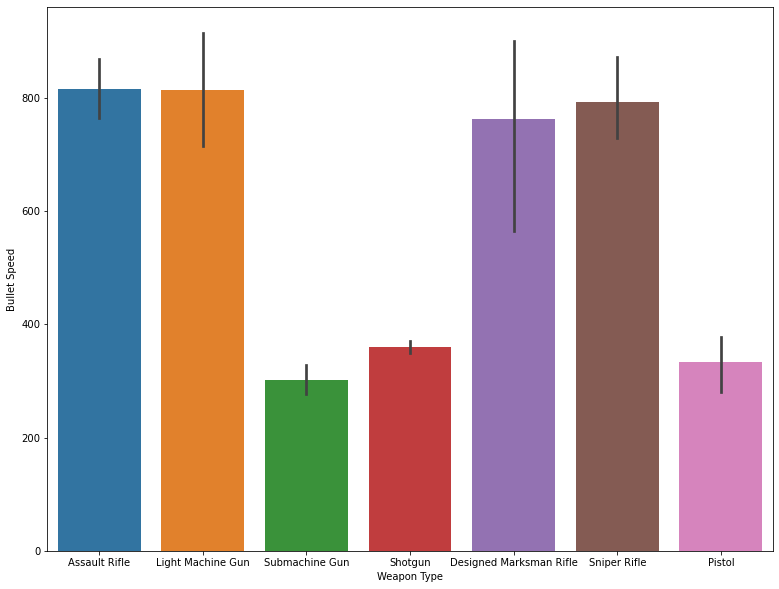

In [58]:
## inspecting the bullet speed
plt.figure(figsize=(13,10))
sns.barplot(x=df['Weapon Type'],y=df['Bullet Speed'],data=bs)
plt.show()

## Here,assault rifles and machine guns are having high bullet speed

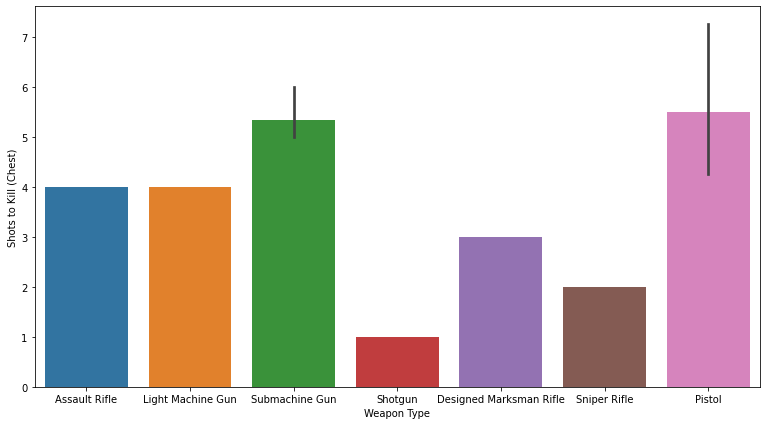

In [63]:
## inspecting shots on chest to kill
plt.figure(figsize=(13,7))
sns.barplot(y=df['Shots to Kill (Chest)'],x=df['Weapon Type'],data=df)
plt.show()

### so in close encounter submachine guns performs well,in case we dont have it use pistol
## UZI is my favourate submission gun

<img src="https://tse2.mm.bing.net/th?id=OIP.2ouUPx8bl-vLC8_77inEowHaE5&pid=Api&P=0&w=240&h=160" width=500px>

In [64]:
most_damaging_weapon_sniper = df[df["Weapon Type"] == "Sniper Rifle"][["Damage", "Weapon Name"]].sort_values("Damage", ascending  = False)
most_damaging_weapon_sniper

,Damage,Weapon Name
27,105,AWM
28,79,M24
29,75,Kar98
30,66,Win94


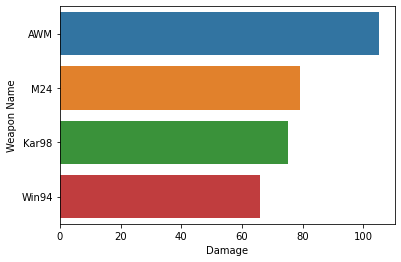

In [65]:
sns.barplot(x=most_damaging_weapon_sniper['Damage'],y=most_damaging_weapon_sniper['Weapon Name'],data=df)

## In case of snipers AWM is having highest damage

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/AWM-338-white.jpg" width=600px>

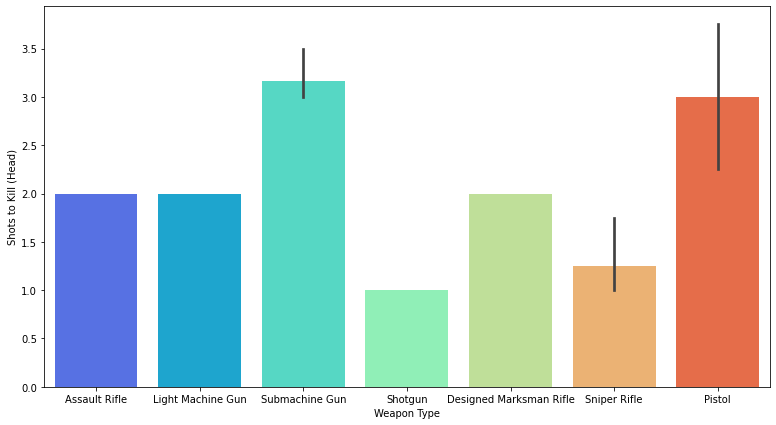

In [72]:
## inspecting shots on head to kill
plt.figure(figsize=(13,7))
sns.barplot(y=df['Shots to Kill (Head)'],x=df['Weapon Type'],data=df,palette="rainbow")
plt.show()

## Upvote if like it and find it useful :)